## Prédiction de Classification
Ce cas d'utilisation est relatif à la prédiction de classification du type de fleurs d'**Iris** (parmi 3 connues: *Setosa*, *Virginica* et *Versicolor*) disposant chacune d'un jeu de données équitable et représentatif dans un fichier: "**iris_data.csv**" contenant 3 x 50 lignes d'attributs (longueur pétale, largeur pétale, longueur sépale et largeur sépale) établi par 2 botanistes. Cette prédiction est un cas d'école de classification (la célèbre collection d'Iris de **Fisher**, bien qu'un peu ancien, elle continue de faire référence dans le domaine).

## Mise en pratique
Pour connaître la répartition des caractéristiques des 3 types et le pourcentage de classification (appartenance) associé sur la base de la fourniture des caractéristiques fournies d'une nouvelle mesure d'une fleur d'Iris (à priori, au regard rapide semblable aux autres), le traitement Python est le suivant:
1. importation des différentes librairies graphiques nécessaires à la représentation graphique du jeu de données initial,
2. chargement du fichier relatif au jeu de données initial,
3. représentation graphique de la dispersion des caractéristiques propres aux 3 types de fleurs d'Iris,
4. instanciation de l'algorithme d'apprentissage basé sur les plus proches voisins (KNN: K-Nearest Neighboors; recherche des plus proches voisins dans une suite linéaire) et découpage du jeu de données initial avec une partie base d'apprentissage et une partie base de test
5. création d'un modèle d'apprentissage pour prédiction sur la base de test,
6. calcul sur la base du modèle, la prédiction en pourcentage relatif à un jeu de données d'attributs relatif à une nouvelle fleur.


In [1]:
# 1. la librairie sklearn contient plusieurs jeux de données, dont celles des Iris
import sklearn
from sklearn.datasets import load_iris

In [4]:
# 2. chargement du jeu de données (Iris; 151 records dont le 1er est relatif aux classes (types) d'Iris)
iris = load_iris()

# 2.1. découpage du jeu de données avec les variables prédictives (attributs) et cibles (classes) 
X, y = iris.data, iris.target
num_samples, num_features = X.shape

# 2.2. quelques informations à but de vérification du contexte décrit (4 attributs, 3 classes et 150 records)
print(num_samples, num_features)
print(iris.data.shape)

(150, 4)
(150, 4)


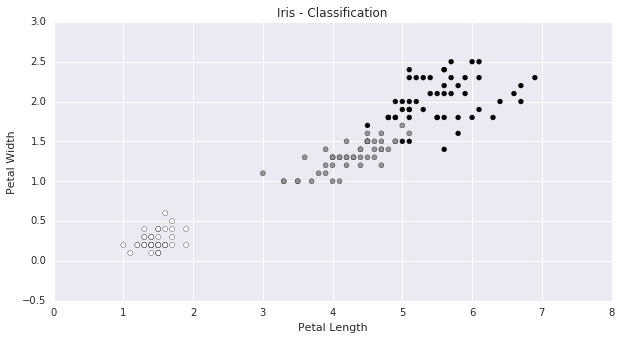

In [5]:
# 3. réprésentation graphique (diagramme de dispersion) relative au jeu de données
%matplotlib inline
import matplotlib
import numpy as np
import seaborn
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))

x = X[:, 2]
y1 = X[:, 3]
iris_spec = iris.target

plt.title('Iris - Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(x, y1, c=iris_spec, marker='.', s=100)

In [11]:
# 4. importation des packages et/ou fonctions relatifs au découpage du jeu de données (apprentissage et test)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, cross_val_score

# 4.1. instanciation de l'algorithme de classification sur la base de la recherche des voisins les + proches (k=5)
knn = KNeighborsClassifier(n_neighbors=5)

print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [12]:
# 5. découpage du jeu de données (variables prédictives et cibles) en 2 jeux (apprentissage et test)
id_train, id_test, il_train, il_test = train_test_split(X, y)

# 5.1 création du modèle d'apprentissage
knn.fit(id_train, il_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
# 6. prise en compte de données de test par le modèle d'apprentissage pour prédiction
knn.predict(id_test)

array([0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1])

In [14]:
# 6..1. prédiction de classification sur les 3 types retenus pour les caractéristiques données d'une nouvelle fleur
knn.predict_proba([[2,5,3,4],])

array([[ 0.2,  0.6,  0.2]])

## Synthèse
Sur la base d'un jeu réduit de donnnées, le résultat de probabilité de classification pour la nouvelle fleur d'Iris parmi les 3 classes retenues est le suivant:

* Setosa [0] = 20%
* Virginica [1] = 60%
* Versicolor [2] = 20%

Ce petit exercice montre la logique globale de la démarche du Machine Learning, il n'est pas représentatif de la complexité des algorithmes de prédiction à retenir et de l'analyse préalable nécessaires pour retenir ceux qui sont appropriés.

In [15]:
!ipython nbconvert ML_Classification_Iris.ipynb --to html

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert`... continue in 5 sec. Press Ctrl-C to quit now.
[NbConvertApp] Converting notebook ML_Classification_Iris.ipynb to html
[NbConvertApp] Writing 233365 bytes to ML_Classification_Iris.html
